## Observations and Insights 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')

# Display the data table for preview
combined_study_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [44]:
# Checking the number of mice.
Mice_count = combined_study_df["Mouse ID"].value_counts()
Mice_count 

g989    13
m546    10
w422    10
q597    10
j119    10
        ..
x336     1
f932     1
l872     1
t573     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
no = combined_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_loc = combined_study_df.loc[combined_study_df.duplicated(subset=['Mouse ID', 'Timepoint']), :]
duplicate_loc

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_loc_byid = duplicate_loc['Mouse ID'].unique()
duplicate_loc_byid


array(['g989'], dtype=object)

In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#combined_study_clean_df= combined_study_df.loc[combined_study_df['Mouse ID'] != [duplicate_loc_byid]]
combined_study_clean_df= combined_study_df[~combined_study_df['Mouse ID'].isin(duplicate_loc_byid)]
combined_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Checking the number of mice in the clean DataFrame.
Mice_count_clean = combined_study_clean_df["Mouse ID"].value_counts()
Mice_count_clean

m546    10
w422    10
q597    10
j119    10
q511    10
        ..
o848     1
b447     1
l872     1
u153     1
d133     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Timepoints'>

<Figure size 432x288 with 0 Axes>

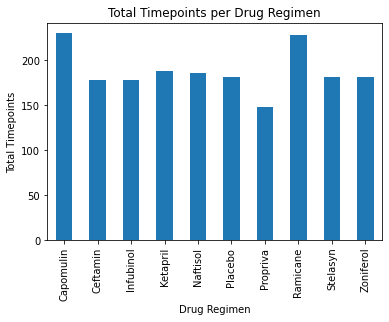

In [121]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Grouped_Regimen_df = combined_study_clean_df.groupby(['Drug Regimen']).count()

plt.figure()
Grouped_Regimen_df.plot(kind="bar", y='Timepoint', xlabel="Drug Regimen", ylabel="Total Timepoints", legend=False, title="Total Timepoints per Drug Regimen")




Text(0, 0.5, 'Total Timepoints')

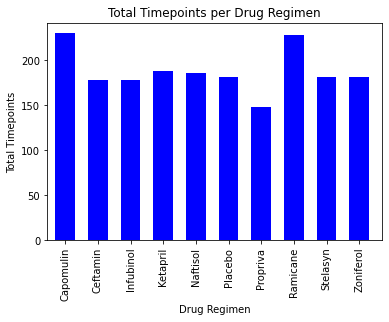

In [119]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(Grouped_Regimen_df))
tick_locations = [value+0.3 for value in x_axis]
plt.figure(figsize=(6,4))
plt.bar(x_axis, Grouped_Regimen_df["Timepoint"], color='b', alpha=1, align="edge", width=0.6)
plt.xticks(tick_locations, list(Grouped_Regimen_df.index), rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
